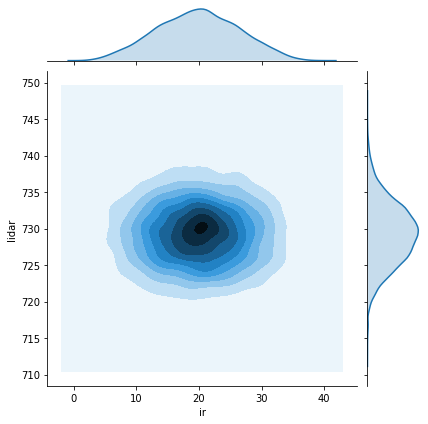

In [10]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

data = pd.read_csv('sensor_data_700.txt', delimiter=' ', header=None, names=('date', 'time', 'ir', 'lidar'))
d = data[(data['time'] < 160000) & (data['time'] >= 120000)]
d = d.loc[:, ['ir', 'lidar']]

sns.jointplot(d['ir'], d['lidar'], d, kind='kde')

In [11]:
print('variance of IR', d.ir.var())
print('variance of LiDAR', d.lidar.var())

diff_ir = d.ir - d.ir.mean()
diff_lidar = d.lidar - d.lidar.mean()

a = diff_ir * diff_lidar
print('covariance', a.sum() / (len(a) - 1))
d.mean()

variance of IR 42.117126367701594
variance of LiDAR 17.702026469211457
covariance -0.3167780338543711


ir        19.860247
lidar    729.311958
dtype: float64

In [12]:
d.cov()

,ir,lidar
ir,42.117126,-0.316778
lidar,-0.316778,17.702026


<a list of 6 text.Text objects>

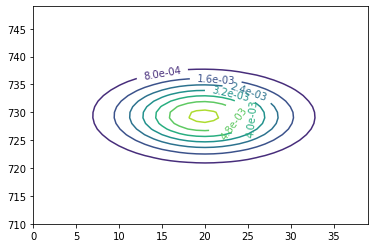

In [14]:
import numpy as np
from scipy.stats import multivariate_normal

irlidar = multivariate_normal(mean=d.mean().values.T, cov=d.cov().values)

x, y = np.mgrid[0:40, 710:750]
pos = np.empty(x.shape + (2,))
pos[:, :, 0] = x
pos[:, :, 1] = y
cont = plt.contour(x, y, irlidar.pdf(pos))
cont.clabel(fmt='%1.1e')

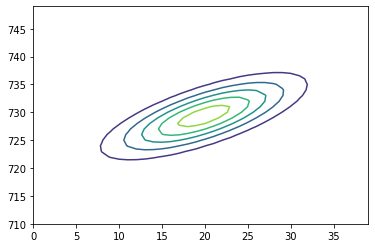

In [16]:
c = d.cov().values + np.array([[0, 20], [20, 0]])
tmp = multivariate_normal(mean=d.mean().values.T, cov=c)
plt.contour(x, y, tmp.pdf(pos))